## Parte 1
-- Creacion de numero para la cantidad de centroides </br>
-- Distancia minima entre centroides</br>
-- lista para los centroides </br>
-- Generamos los centroides garantizando una distancia </br>
-- se genera un centroide principal entre las coordenadas dadas </br>
-- se vreifica si esta en distancia aceptable y lo agrega </br>
-- se genera una desviasion para los puntos </br>
-- se crean los puntos sinteticamente para cada centroide

In [2044]:
# Importación de las librerías necesarias
from sklearn.datasets import make_blobs  # Generación de datos sintéticos
import numpy as np  # Operaciones matemáticas y generación de números aleatorios

# Paso 1: Generar aleatoriamente un número de centroides entre 1 y 10
num_centroids = np.random.randint(1, 11)

# Paso 2: Definir la distancia mínima requerida entre los centroides
min_distance = 1  # Asegura que los centroides no estén demasiado cerca entre sí

# Inicialización de una lista para almacenar los centroides generados
blob_centers = []

# Paso 3: Generar los centroides garantizando la distancia mínima entre ellos
while len(blob_centers) < num_centroids:
    # Generar un centroide candidato con coordenadas aleatorias en el rango [-10, 10]
    candidate = np.random.uniform(-10, 10, size=2)
    
    # Verificar que el centroide candidato esté a la distancia mínima de los existentes
    if all(np.linalg.norm(candidate - np.array(c)) >= min_distance for c in blob_centers):
        blob_centers.append(candidate)  # Agregar el centroide válido a la lista

# Convertir la lista de centroides en un arreglo numpy para facilitar su uso posterior
blob_centers = np.array(blob_centers)

# Paso 4: Generar desviaciones estándar aleatorias para cada clúster
# Estas desviaciones estándar controlan la dispersión de los puntos alrededor de cada centroide
blob_std = np.random.uniform(0.5, 2.0, size=num_centroids)

# Paso 5: Generar los datos sintéticos usando make_blobs
# n_samples: Número total de puntos a generar (2000 en este caso)
# centers: Posición de los centroides generados
# cluster_std: Dispersión de los puntos alrededor de cada centroide
# random_state: Semilla para asegurar reproducibilidad
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Imprimir resultados relevantes
print(f"Cantidad de centroides: {num_centroids}")
print(f"Centroides generados:\n{blob_centers}")


Cantidad de centroides: 5
Centroides generados:
[[-0.70117342 -7.05698718]
 [ 0.55317517 -6.05360841]
 [-2.88839146 -0.69015978]
 [ 2.34076117  2.77705456]
 [-5.78536403 -3.19475227]]


In [2045]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    # Grafica los puntos generados con colores distintos por cluster (si se pasa y)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=5)  
    plt.xlabel("$x_1$", fontsize=14)  # Etiqueta del eje X
    plt.ylabel("$x_2$", fontsize=14, rotation=0)  # Etiqueta del eje Y
    plt.title("Distribución de Clusters Generados", fontsize=16)  # Título de la gráfica
    plt.colorbar(label='Cluster')  # Barra de colores para identificar clusters
    plt.show()  # Muestra la gráfica


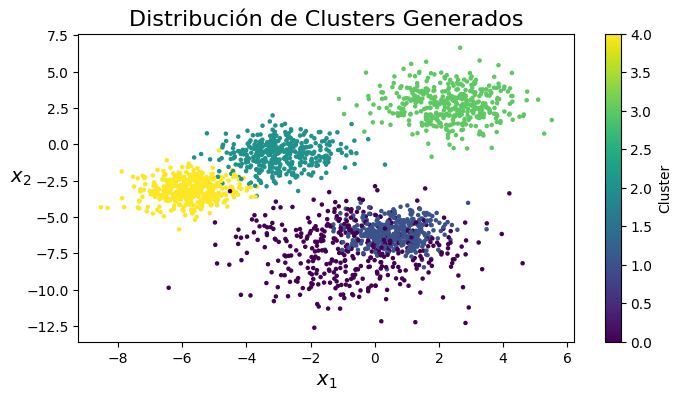

In [2046]:
plt.figure(figsize=(8, 4))  # Crear figura con tamaño personalizado
plot_clusters(X, y)          # Graficar los clusters
plt.show()                   # Mostrar la gráfica


## Parte 2: Implementación de K-Means
-- Utilizando la cantidad de centroides sacamos los klusters</br>
-- La creacion del modelo de kmeans con el numero de kluster y semilla fija</br>
-- ajustamos el modelo con los datos x y predecimos las etiquetas para cada punto


In [2047]:
from sklearn.cluster import KMeans  # Importa el algoritmo de K-Means desde scikit-learn

# Utilizar el número de centroides generados previamente como la cantidad de clusters (k)
k = num_centroids  # num_centroids se define en otro bloque anterior
print(f"Usando k = {k} clusters para K-Means")

# Crear una instancia del modelo K-Means con k clusters y una semilla aleatoria fija
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo con los datos de entrada X y predecir las etiquetas para cada punto
y_pred = kmeans.fit_predict(X)  # Devuelve las etiquetas correspondientes a cada cluster

# Imprimir las etiquetas asignadas a cada punto de los datos de entrada
print("Etiquetas predichas para cada punto:")
print(y_pred)


Usando k = 5 clusters para K-Means
Etiquetas predichas para cada punto:
[2 4 0 ... 1 3 4]


-- obtenemos los centroides predecidos</br>
-- comparamos con los centroides originales

In [2048]:
# Obtener los centroides encontrados por K-Means
centroids = kmeans.cluster_centers_

# Mostrar los centroides encontrados
print("Centroides encontrados por K-Means:")
print(centroids)

# Asegúrate de tener los centroides originales disponibles en esta variable
# original_centroids debería contener los valores anteriores o los reales, si es aplicable
print("Centroides originales:")
print(blob_centers)

# Calcular la diferencia entre los centroides originales y los encontrados por K-Means
diferencia = centroids - blob_centers

# Mostrar la diferencia en consola
print("Diferencia entre los centroides originales y los encontrados:")
print(diferencia)

Centroides encontrados por K-Means:
[[-1.43414065 -8.4096546 ]
 [ 2.34508985  2.76270797]
 [-5.67140836 -3.23333483]
 [ 0.5647321  -6.09243137]
 [-2.89026449 -0.63748523]]
Centroides originales:
[[-0.70117342 -7.05698718]
 [ 0.55317517 -6.05360841]
 [-2.88839146 -0.69015978]
 [ 2.34076117  2.77705456]
 [-5.78536403 -3.19475227]]
Diferencia entre los centroides originales y los encontrados:
[[-0.73296723 -1.35266741]
 [ 1.79191468  8.81631638]
 [-2.7830169  -2.54317505]
 [-1.77602906 -8.86948593]
 [ 2.89509954  2.55726704]]


## Parte 3
--# Definir nuevos puntos para clasificar con K-Means </br>

In [2049]:
from sklearn.cluster import KMeans  # Importar K-Means
import numpy as np  # Importar NumPy

# Definir nuevos puntos para clasificar
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Obtener los centroides del modelo K-Means ya entrenado
centroids = kmeans.cluster_centers_

# Mostrar las distancias y sugerir el cluster más cercano
print("Sugerencias de clusters basadas en distancias a los centroides:")
for i, point in enumerate(X_new):
    # Calcular distancias del punto actual a cada centroide
    distancias = np.linalg.norm(centroids - point, axis=1)
    
    # Encontrar el cluster más cercano (mínima distancia)
    cluster_sugerido = np.argmin(distancias)
    
    print(f"Punto {point} debería pertenecer al cluster {cluster_sugerido} (distancia: {distancias[cluster_sugerido]:.2f})")
    print(f"Distancias a los centroides: {distancias}")


Sugerencias de clusters basadas en distancias a los centroides:
Punto [0. 2.] debería pertenecer al cluster 1 (distancia: 2.47)
Distancias a los centroides: [10.50798117  2.46600281  7.7170374   8.11211241  3.91279403]
Punto [3. 2.] debería pertenecer al cluster 1 (distancia: 1.01)
Distancias a los centroides: [11.31470336  1.00530132 10.12823363  8.45091564  6.45380075]
Punto [-3.  3.] debería pertenecer al cluster 4 (distancia: 3.64)
Distancias a los centroides: [11.51660252  5.35035447  6.78165804  9.76624918  3.6391401 ]
Punto [-3.   2.5] debería pertenecer al cluster 4 (distancia: 3.14)
Distancias a los centroides: [11.02145539  5.35154192  6.32515224  9.30253685  3.13940368]


In [2050]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar los datos
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# Función para graficar los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

# Función para graficar las fronteras de decisión
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # Definir límites para las fronteras
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    # Crear una malla de puntos para predecir las zonas de cluster
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las fronteras con colores suaves
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # Graficar los puntos de datos y los centroides si corresponde
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Opcionalmente, mostrar etiquetas en los ejes
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


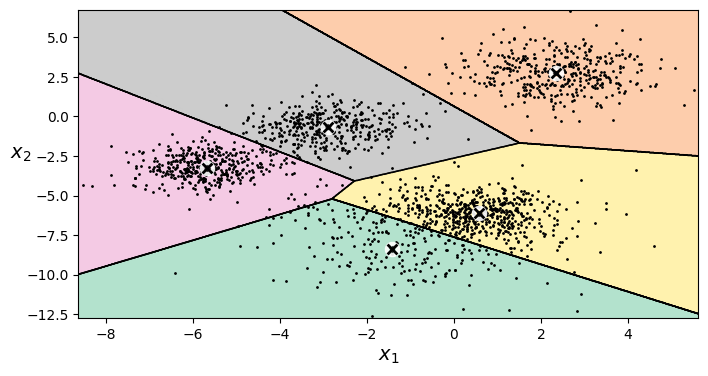

In [2051]:
# Crear una figura con un tamaño personalizado
plt.figure(figsize=(8, 4))

# Graficar las fronteras de decisión usando el modelo entrenado K-Means
plot_decision_boundaries(kmeans, X)

# Mostrar la gráfica
plt.show()


In [2052]:
# Calcular las distancias de los nuevos puntos a cada centroide
# 'kmeans.transform()' devuelve una matriz con las distancias de cada punto nuevo a los centroides
distances = kmeans.transform(X_new)

# Mostrar las distancias calculadas en consola
print("Distancias de los nuevos puntos a cada centroide:")
for i, point in enumerate(X_new):
    # Cada fila de 'distances' contiene las distancias del punto actual a todos los centroides
    print(f"Punto {point}: {distances[i]}")


Distancias de los nuevos puntos a cada centroide:
Punto [0. 2.]: [10.50798117  2.46600281  7.7170374   8.11211241  3.91279403]
Punto [3. 2.]: [11.31470336  1.00530132 10.12823363  8.45091564  6.45380075]
Punto [-3.  3.]: [11.51660252  5.35035447  6.78165804  9.76624918  3.6391401 ]
Punto [-3.   2.5]: [11.02145539  5.35154192  6.32515224  9.30253685  3.13940368]


In [2053]:
from sklearn.cluster import KMeans  # Importar el algoritmo de K-Means desde scikit-learn

# Definir y entrenar el modelo K-Means con diferentes iteraciones
# Modelo con 1 iteración usando el algoritmo de Lloyd
kmeans_iter1 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                      algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter1.fit(X)  # Entrenar el modelo con los datos X

# Modelo con 2 iteraciones usando el algoritmo de Lloyd
kmeans_iter2 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                      algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter2.fit(X)  # Entrenar el modelo con los datos X

# Modelo con 3 iteraciones usando el algoritmo de Lloyd
kmeans_iter3 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                      algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter3.fit(X)  # Entrenar el modelo con los datos X

# Modelo con 4 iteraciones usando el algoritmo de Lloyd
kmeans_iter4 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                      algorithm="lloyd", max_iter=4, random_state=1)
kmeans_iter4.fit(X)  # Entrenar el modelo con los datos X

# Modelo con 200 iteraciones usando el algoritmo de Elkan (más eficiente)
kmeans_iter5 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                      algorithm="elkan", max_iter=200, random_state=1)
kmeans_iter5.fit(X)  # Entrenar el modelo con los datos X

# Imprimir resultados relevantes
print(f"Cantidad de centroides: {num_centroids}")
print(f"Centroides generados:\n{blob_centers}")


# Mostrar los centroides encontrados para cada modelo entrenado
print(f"Centroides del modelo con {num_centroids} clusters (iteración 1):")
print(kmeans_iter1.cluster_centers_)

print(f"\nCentroides del modelo con {num_centroids} clusters (iteración 2):")
print(kmeans_iter2.cluster_centers_)

print(f"\nCentroides del modelo con {num_centroids} clusters (iteración 3):")
print(kmeans_iter3.cluster_centers_)

print(f"\nCentroides del modelo con {num_centroids} clusters (iteración 4):")
print(kmeans_iter4.cluster_centers_)

print(f"\nCentroides del modelo con {num_centroids} clusters (iteración 200):")
print(kmeans_iter5.cluster_centers_)


Cantidad de centroides: 5
Centroides generados:
[[-0.70117342 -7.05698718]
 [ 0.55317517 -6.05360841]
 [-2.88839146 -0.69015978]
 [ 2.34076117  2.77705456]
 [-5.78536403 -3.19475227]]
Centroides del modelo con 5 clusters (iteración 1):
[[-1.54413157 -6.74372813]
 [-5.75616269 -3.83094874]
 [-5.15060042 -2.29218484]
 [-0.16487042  1.26931852]
 [ 0.86406169 -6.38095215]]

Centroides del modelo con 5 clusters (iteración 2):
[[-1.56182656 -7.31766368]
 [-5.92064291 -3.69066059]
 [-4.21798912 -1.57515185]
 [ 1.12374599  1.9728607 ]
 [ 0.8497739  -6.35628125]]

Centroides del modelo con 5 clusters (iteración 3):
[[-1.57118441 -7.70915999]
 [-5.87975034 -3.38114092]
 [-3.29805321 -0.9546788 ]
 [ 2.16372071  2.62080773]
 [ 0.76641968 -6.22353441]]

Centroides del modelo con 5 clusters (iteración 4):
[[-1.54527774 -8.04010382]
 [-5.7581277  -3.24622722]
 [-2.97872761 -0.72982521]
 [ 2.31627142  2.74692123]
 [ 0.6741662  -6.13352445]]

Centroides del modelo con 5 clusters (iteración 200):
[[-1.4

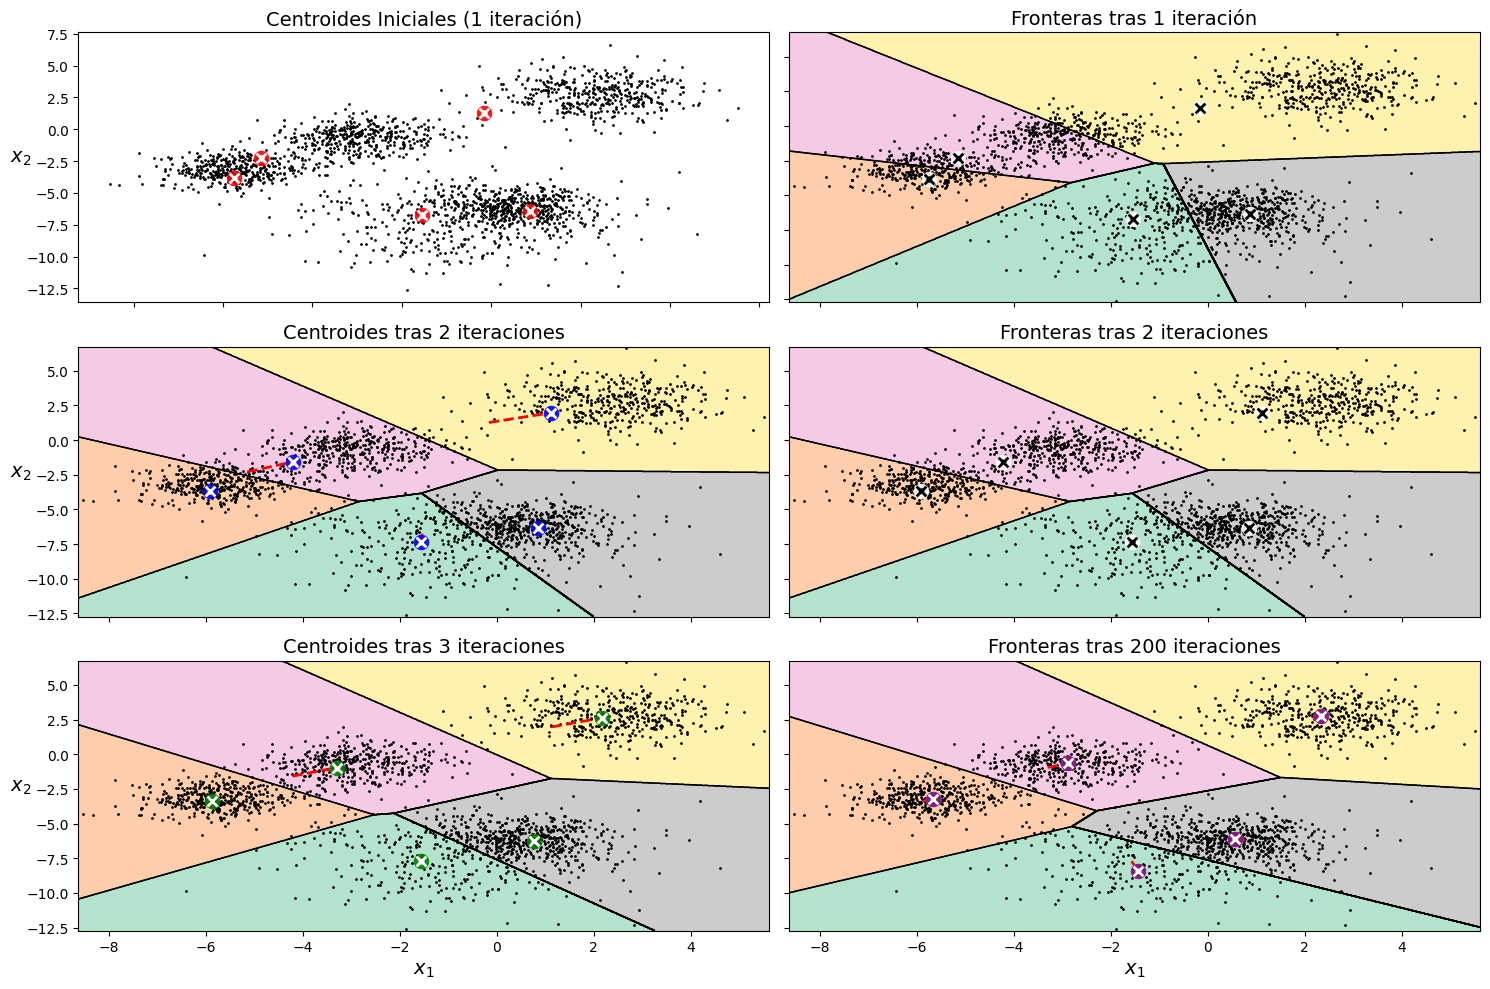

In [2054]:
import matplotlib.pyplot as plt

def plot_centroid_movements(old_centroids, new_centroids):
    """Dibuja líneas entre los centroides antiguos y nuevos."""
    for old, new in zip(old_centroids, new_centroids):
        plt.plot([old[0], new[0]], [old[1], new[1]], 'r--', lw=2)

# Crear una figura con subplots 3x2
plt.figure(figsize=(15, 10))

# Subplot 1: Datos y centroides iniciales (iteración 1)
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Centroides Iniciales (1 iteración)", fontsize=14)

# Subplot 2: Fronteras del modelo tras 1 iteración
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Fronteras tras 1 iteración", fontsize=14)

# Subplot 3: Fronteras y movimientos del modelo iter2
plt.subplot(323)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False, show_xlabels=False)
plot_centroid_movements(kmeans_iter1.cluster_centers_, kmeans_iter2.cluster_centers_)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='b', cross_color='w')
plt.title("Centroides tras 2 iteraciones", fontsize=14)

# Subplot 4: Fronteras del modelo tras 2 iteraciones
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.title("Fronteras tras 2 iteraciones", fontsize=14)

# Subplot 5: Fronteras y movimientos del modelo iter3
plt.subplot(325)
plot_decision_boundaries(kmeans_iter3, X, show_centroids=False)
plot_centroid_movements(kmeans_iter2.cluster_centers_, kmeans_iter3.cluster_centers_)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='g', cross_color='w')
plt.title("Centroides tras 3 iteraciones", fontsize=14)

# Subplot 6: Fronteras finales con el modelo iter5 (200 iteraciones)
plt.subplot(326)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)
plot_centroid_movements(kmeans_iter3.cluster_centers_, kmeans_iter5.cluster_centers_)
plot_centroids(kmeans_iter5.cluster_centers_, circle_color='purple', cross_color='w')
plt.title("Fronteras tras 200 iteraciones", fontsize=14)

# Mostrar la figura completa
plt.tight_layout()
plt.show()


para comparar visualmente dos modelos de clustering (como K-Means) utilizando los mismos datos.


In [2055]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrenar ambos modelos en los mismos datos
    clusterer1.fit(X)
    clusterer2.fit(X)

    # Crear la figura para comparación
    plt.figure(figsize=(10, 3.2))

    # Subplot 1: Fronteras de decisión del primer modelo
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    # Subplot 2: Fronteras de decisión del segundo modelo
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

    # Mostrar la comparación
    plt.show()


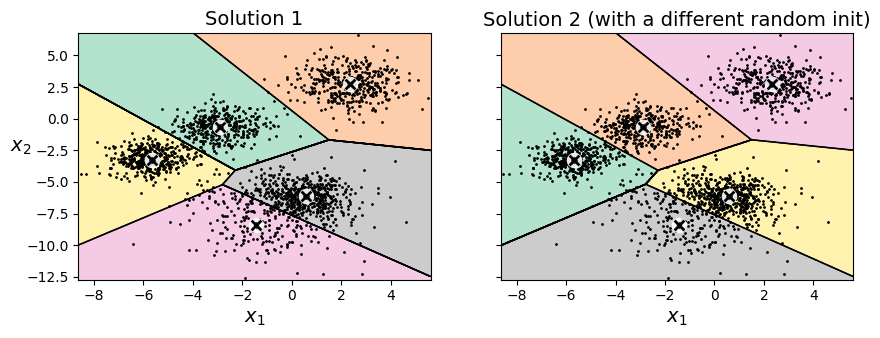

In [2056]:
# Importar el algoritmo K-Means desde scikit-learn
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  # Importar Matplotlib para visualizar

# Crear dos modelos K-Means con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(
    n_clusters=num_centroids,  # Número de clusters
    init="random",             # Inicialización aleatoria
    n_init=1,                  # Solo una inicialización
    algorithm="lloyd",          # Usar el algoritmo clásico de Lloyd
    random_state=11             # Semilla aleatoria para reproducibilidad
)

kmeans_rnd_init2 = KMeans(
    n_clusters=num_centroids,  # Número de clusters
    init="random",             # Inicialización aleatoria
    n_init=10,                 # Realizar 10 inicializaciones
    algorithm="lloyd",          # Usar el algoritmo de Lloyd
    random_state=19,            # Semilla diferente para reproducibilidad
    max_iter=100                # Máximo de 100 iteraciones para convergencia
)

# Comparar las soluciones usando la función plot_clusterer_comparison
plot_clusterer_comparison(
    kmeans_rnd_init1, kmeans_rnd_init2, X,  # Modelos y datos de entrada
    title1="Solution 1",                    # Título para la primera solución
    title2="Solution 2 (with a different random init)"  # Título para la segunda solución
)

# Mostrar la gráfica en pantalla
plt.show()


a inercia mide la suma de las distancias cuadradas de cada punto a su centroide más cercano.
Menor inercia indica mejor agrupación, aunque siempre depende del tamaño del dataset y el número de clusters.

In [2057]:
# Importar el algoritmo K-Means desde scikit-learn
from sklearn.cluster import KMeans  

# Crear un modelo K-Means con 10 inicializaciones aleatorias
kmeans_rnd_10_inits = KMeans(
    n_clusters=num_centroids,  # Número de clusters (centroides) a crear
    init="random",             # Inicialización aleatoria de los centroides
    n_init=10,                 # Realizar 10 inicializaciones distintas para mayor estabilidad
    algorithm="elkan",          # Algoritmo Elkan, más eficiente para grandes datasets
    random_state=11             # Semilla para reproducibilidad de los resultados
)

# Entrenar el modelo con los datos de entrada X
kmeans_rnd_10_inits.fit(X)  

# Mostrar los centroides finales encontrados por el modelo
print(f"Centroides finales con {num_centroids} clusters:")
print(kmeans_rnd_10_inits.cluster_centers_)

# Mostrar la inercia del modelo, que mide la calidad de la agrupación
print(f"Inercia del modelo: {kmeans_rnd_10_inits.inertia_}")


Centroides finales con 5 clusters:
[[-2.89026449 -0.63748523]
 [ 2.34508985  2.76270797]
 [-1.43414065 -8.4096546 ]
 [-5.67140836 -3.23333483]
 [ 0.5647321  -6.09243137]]
Inercia del modelo: 4227.534147241159


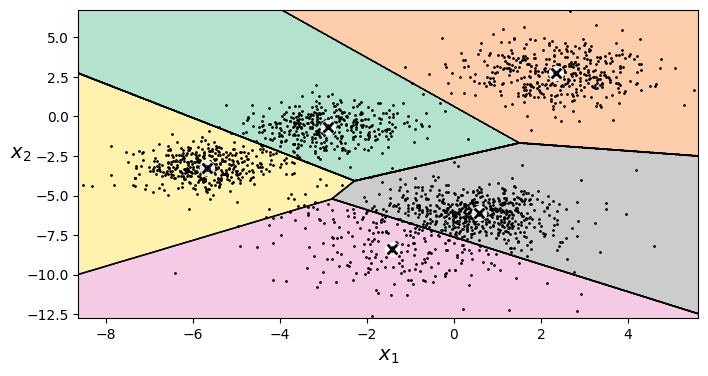

In [2058]:
# Crear la figura para mostrar las fronteras de decisión
plt.figure(figsize=(8, 4))

# Graficar las fronteras de decisión usando el modelo entrenado en la parte 14
plot_decision_boundaries(kmeans_rnd_10_inits, X)

# Mostrar la gráfica
plt.show()


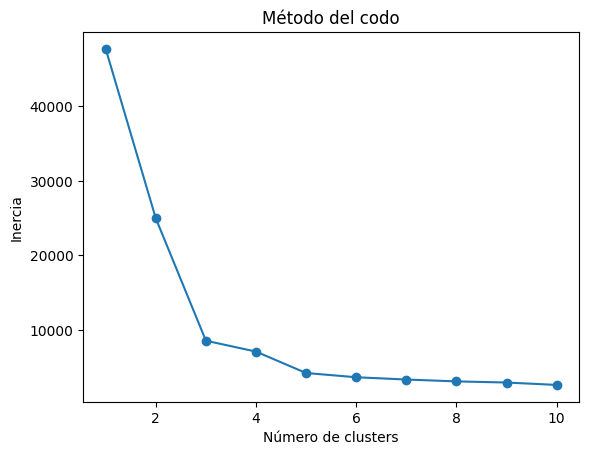

In [2059]:
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


silhouette_score para medir la calidad del clustering basado en la cohesión interna de los puntos (qué tan cerca están los puntos dentro de un cluster) y la separación entre clusters.

Resultado:
Se imprime el puntaje de Silhouette, el cual tiene un rango de -1 a 1:

Cercano a 1: Buena separación entre clusters y cohesión interna alta.
Cercano a 0: Los clusters se superponen.
Negativo: Puntos mal asignados (más cercanos a otro cluster).


In [2060]:
from sklearn.metrics import silhouette_score
labels = kmeans_iter5.fit_predict(X)
sil_score = silhouette_score(X, labels)
print(f"Puntaje Silhouette: {sil_score}")

Puntaje Silhouette: 0.5545149864969449


Este código evalúa diferentes configuraciones del modelo K-Means probando varios valores de k (número de clusters) y calcula el puntaje de Silhouette para cada modelo. El objetivo es determinar cuál es el número óptimo de clusters que mejor separa y agrupa los datos

Cantidad de modelos entrenados: 4
Cantidad de clusters generados: 5
Silhouette Scores: [np.float64(0.4468372919865413), np.float64(0.6271287961920697), np.float64(0.5555599696564018), np.float64(0.5545149864969449)]


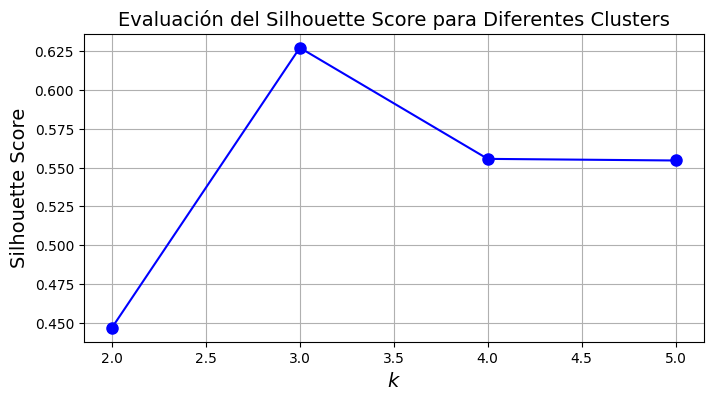

In [2061]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans  # Para el algoritmo K-Means
from sklearn.metrics import silhouette_score  # Para el puntaje de Silhouette
import matplotlib.pyplot as plt  # Para la visualización

# Entrenar múltiples modelos K-Means con diferentes números de clusters (k)
# Los valores de k van de 2 hasta num_centroids
kmeans_per_k = [
    KMeans(
        n_clusters=k,              # Número de clusters (k)
        random_state=42,            # Semilla para reproducibilidad
        init="random",              # Inicialización aleatoria de los centroides
        n_init=1,                   # Una inicialización por modelo
        algorithm="lloyd"           # Algoritmo clásico de Lloyd
    ).fit(X)                        # Entrenar el modelo con los datos X
    for k in range(2, num_centroids + 1)
]
print("Cantidad de modelos entrenados:", len(kmeans_per_k))

# Calcular los puntajes de Silhouette para cada modelo entrenado
# silhouette_score() mide la calidad del clustering para cada valor de k
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Imprimir la cantidad de clusters evaluados y sus Silhouette Scores
print(f"Cantidad de clusters generados: {num_centroids}")
print("Silhouette Scores:", silhouette_scores)

# Graficar los Silhouette Scores para analizar los resultados
plt.figure(figsize=(8, 4))  # Definir el tamaño de la figura
plt.plot(
    range(2, num_centroids + 1),  # Eje X: número de clusters
    silhouette_scores,            # Eje Y: Silhouette Scores
    "bo-",                        # Estilo de la línea y los puntos
    linewidth=1.5, markersize=8   # Ancho de línea y tamaño de los puntos
)
plt.xlabel("$k$", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Silhouette Score", fontsize=14)  # Etiqueta del eje Y
plt.title("Evaluación del Silhouette Score para Diferentes Clusters", fontsize=14)  # Título
plt.grid(True)  # Mostrar una cuadrícula en la gráfica
plt.show()  # Mostrar la gráfica


Este código crea gráficas individuales de Silhouette para varios valores de 
𝑘
k (número de clusters). Las gráficas de coeficientes de Silhouette permiten visualizar la calidad del clustering para cada punto, mostrando:

Qué tan bien agrupado está un punto dentro de su propio cluster.
Qué tan bien está separado de los otros clusters.
Cada gráfica individual muestra los coeficientes de Silhouette para cada cluster, con colores diferenciados, y marca con una línea discontinua roja el puntaje promedio de Silhouette para ese valor de 
𝑘
k.

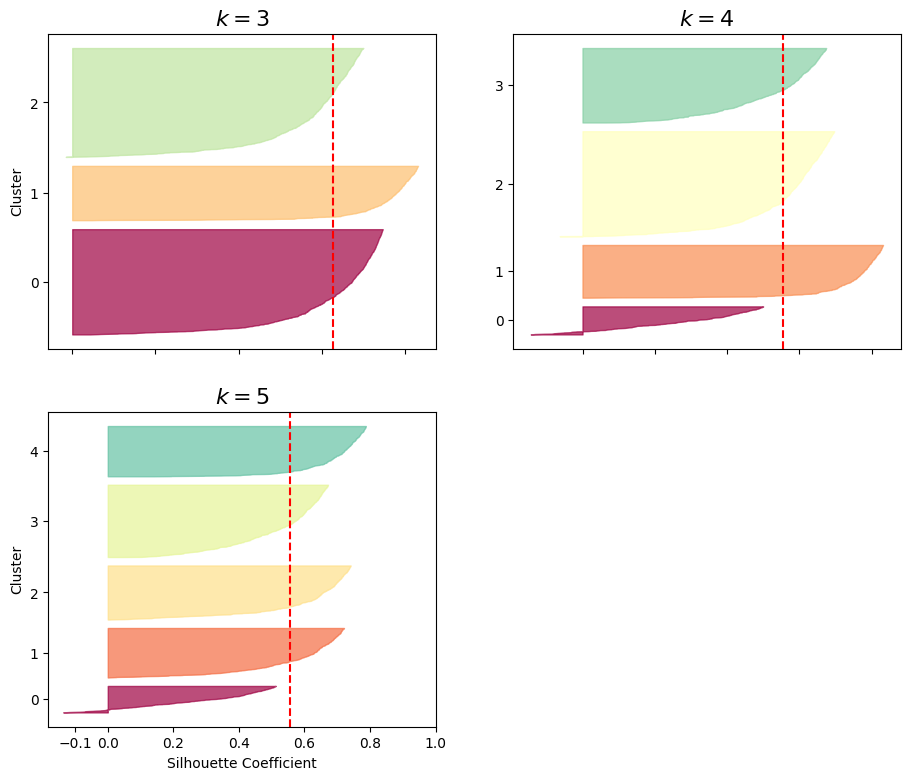

In [2062]:
# Importar las métricas y funciones necesarias
from sklearn.metrics import silhouette_samples  # Para calcular los coeficientes individuales de Silhouette
from matplotlib.ticker import FixedLocator, FixedFormatter  # Para formatear los ejes de las gráficas
import matplotlib as mpl  # Biblioteca de gráficos

# Crear una figura grande con múltiples subplots para diferentes valores de k
plt.figure(figsize=(11, 9))  # Definir el tamaño de la figura

# Iterar sobre valores de k desde 3 hasta el menor valor entre 7 y num_centroids + 1
for k in range(3, min(7, num_centroids + 1)):
    plt.subplot(2, 2, k - 2)  # Crear un subplot en una cuadrícula 2x2

    # Obtener las etiquetas predichas para el valor actual de k
    y_pred = kmeans_per_k[k - 2].labels_

    # Calcular los coeficientes de Silhouette para cada punto
    silhouette_coefficients = silhouette_samples(X, y_pred)

    # Preparar los parámetros para posicionar los clusters en el gráfico
    padding = len(X) // 30  # Espacio entre clusters
    pos = padding  # Posición inicial para el primer cluster
    ticks = []  # Lista para almacenar las posiciones de los clusters en el eje Y

    # Iterar sobre cada cluster y dibujar su coeficiente de Silhouette
    for i in range(k):
        # Filtrar los coeficientes de Silhouette correspondientes al cluster actual
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()  # Ordenar los coeficientes para una mejor visualización

        # Asignar un color único al cluster usando un mapa de colores
        color = mpl.cm.Spectral(i / k)
        # Dibujar un área rellena con los coeficientes del cluster actual
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Almacenar la posición media del cluster para los ticks del eje Y
        ticks.append(pos + len(coeffs) // 2)
        # Actualizar la posición para el siguiente cluster
        pos += len(coeffs) + padding

    # Formatear el eje Y con las posiciones de los clusters
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Añadir etiquetas al eje Y para algunos subplots
    if k in (3, 5):
        plt.ylabel("Cluster")

    # Configurar los ticks del eje X y añadir etiquetas si corresponde
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)  # Ocultar etiquetas del eje X para algunos subplots

    # Dibujar una línea vertical roja en el puntaje promedio de Silhouette
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    # Añadir un título con el valor de k
    plt.title("$k={}$".format(k), fontsize=16)

# Mostrar la figura completa con todos los subplots
plt.show()
